In [156]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
import qutip as qt
from IPython.display import HTML

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=200, formatter={'float': '{:.3f}'.format})

# Study of the properties of the qubit vs inductance asymmetry (Δ) and external flux (φ_ext)

In [2]:
# Fundamental constants
h    = 6.62607015e-34
GHz  = 1e9
e0   = 1.602176634e-19
Φ_0 = h/(2*e0)

## KIT's qubit

This notebook studies the qubit proposed by KIT. It's lumped element model is:
<img src='Other/Single qubit 4 nodes CC coupled to ground.jpg' width='500'>


In [3]:
# Circuit parameters
Csh = 15
C   = 15
Cg  = 10
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ  = 10.0
l = Lq*(Lq+4*Lr) - 4*Δ**2

E_J = EJ * 1e9
L_r = l/Lq * 1e-9
E_L_r = (Φ_0/(2*np.pi))**2/L_r / h

In [4]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)
C_f = Cf * 1e-15
L_f = Lf * 1e-9
Z_f = np.sqrt(L_f/C_f)

L_r = l/Lq * 1e-9
C_r = C/2 * 1e-15
Z_r = np.sqrt(L_r/C_r)

In [5]:
φ_ext_avoided_crossing_1q_1r = 0.372
φ_ext_avoided_crossing_2q_1r = 0.464

## Circuit definitions

In [136]:
geom_len = 10
lin_len = 5
# Δ_values = np.concatenate( (np.array([1e-10]), np.geomspace(1e-3,1e-1, geom_len * 2//3), np.geomspace(1e-1,1, geom_len//3), np.linspace(1,10,lin_len) ))
# Δ_values = np.concatenate( (np.array([1e-10]), np.geomspace(1e-3, 1e-1, geom_len), np.linspace(1e-1,1,lin_len) ))
Δ_values = np.array([1e-10, 1e-3])
qubit = sq_ext.KIT_qubit()
qubit_vs_Δ = [ sq_ext.KIT_qubit(Δ=Δ) for Δ in Δ_values]
resonator_vs_Δ = [ sq_ext.KIT_resonator(Δ=Δ) for Δ in Δ_values]
fluxonium_vs_Δ = [ sq_ext.KIT_fluxonium(Δ=Δ) for Δ in Δ_values]

n_max_resonator = 10
n_max_fluxonium = 10

trunc_nums_resonator = [n_max_resonator]
trunc_nums_fluxonium = [n_max_fluxonium]

trunc_nums = [1, n_max_resonator, n_max_fluxonium]
trunc_nums_Δ_0 = [ n_max_resonator, n_max_fluxonium]

for i in range(len(qubit_vs_Δ)):
    resonator_vs_Δ[i].set_trunc_nums(trunc_nums_resonator)
    fluxonium_vs_Δ[i].set_trunc_nums(trunc_nums_fluxonium)
    try:
        qubit_vs_Δ[i].set_trunc_nums(trunc_nums)
    except:
        qubit_vs_Δ[i].set_trunc_nums(trunc_nums_Δ_0)

In [7]:
qubit_vs_Δ[1].description()
sq_ext.print_flux_transformation(qubit_vs_Δ[1])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Φ_1 = [ 0.00  0.00  1.00]
Φ_2 = [ 1.00  1.00  0.62]
Φ_3 = [-1.00  1.00  0.00]


In [8]:
qubit_vs_Δ[-1].description()
sq_ext.print_flux_transformation(qubit_vs_Δ[-1])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Φ_1 = [ 0.00  0.00  1.00]
Φ_2 = [ 1.00  0.82  0.57]
Φ_3 = [-0.50  1.00  0.12]


# Spectrum

## Spectrum vs $φ_\text{ext}$ for different $Δ$

In [130]:
φ_ext_values = np.linspace(0,1,100)
Δ_values_plot = [1e-10, 1e-2, 1e-1, 1]
n_eig = 6
Δ_indices_plot = []

E_qubit_vs_Δ_φext     = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig])
E_fluxonium_vs_Δ_φext = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig//2])
E_resonator_vs_Δ_φext = np.zeros([len(Δ_values_plot), len(φ_ext_values), n_eig//2])

for i, Δ_value in enumerate(Δ_values_plot):
    Δ_index = (np.abs(Δ_values - Δ_value)).argmin()
    Δ_indices_plot.append(Δ_index)
    qubit_Δ     = qubit_vs_Δ[Δ_index]
    fluxonium_Δ = fluxonium_vs_Δ[Δ_index]
    resonator_Δ = resonator_vs_Δ[Δ_index]

    for j, φ_ext in enumerate(φ_ext_values):
        qubit_Δ    .loops[0].set_flux(φ_ext)
        fluxonium_Δ.loops[0].set_flux(φ_ext)

        E_qubit_vs_Δ_φext    [i, j , :] = qubit_Δ.diag(n_eig)[0]
        E_fluxonium_vs_Δ_φext[i, j , :] = fluxonium_Δ.diag(n_eig//2)[0]
        E_resonator_vs_Δ_φext[i, j , :] = resonator_Δ.diag(n_eig//2)[0]

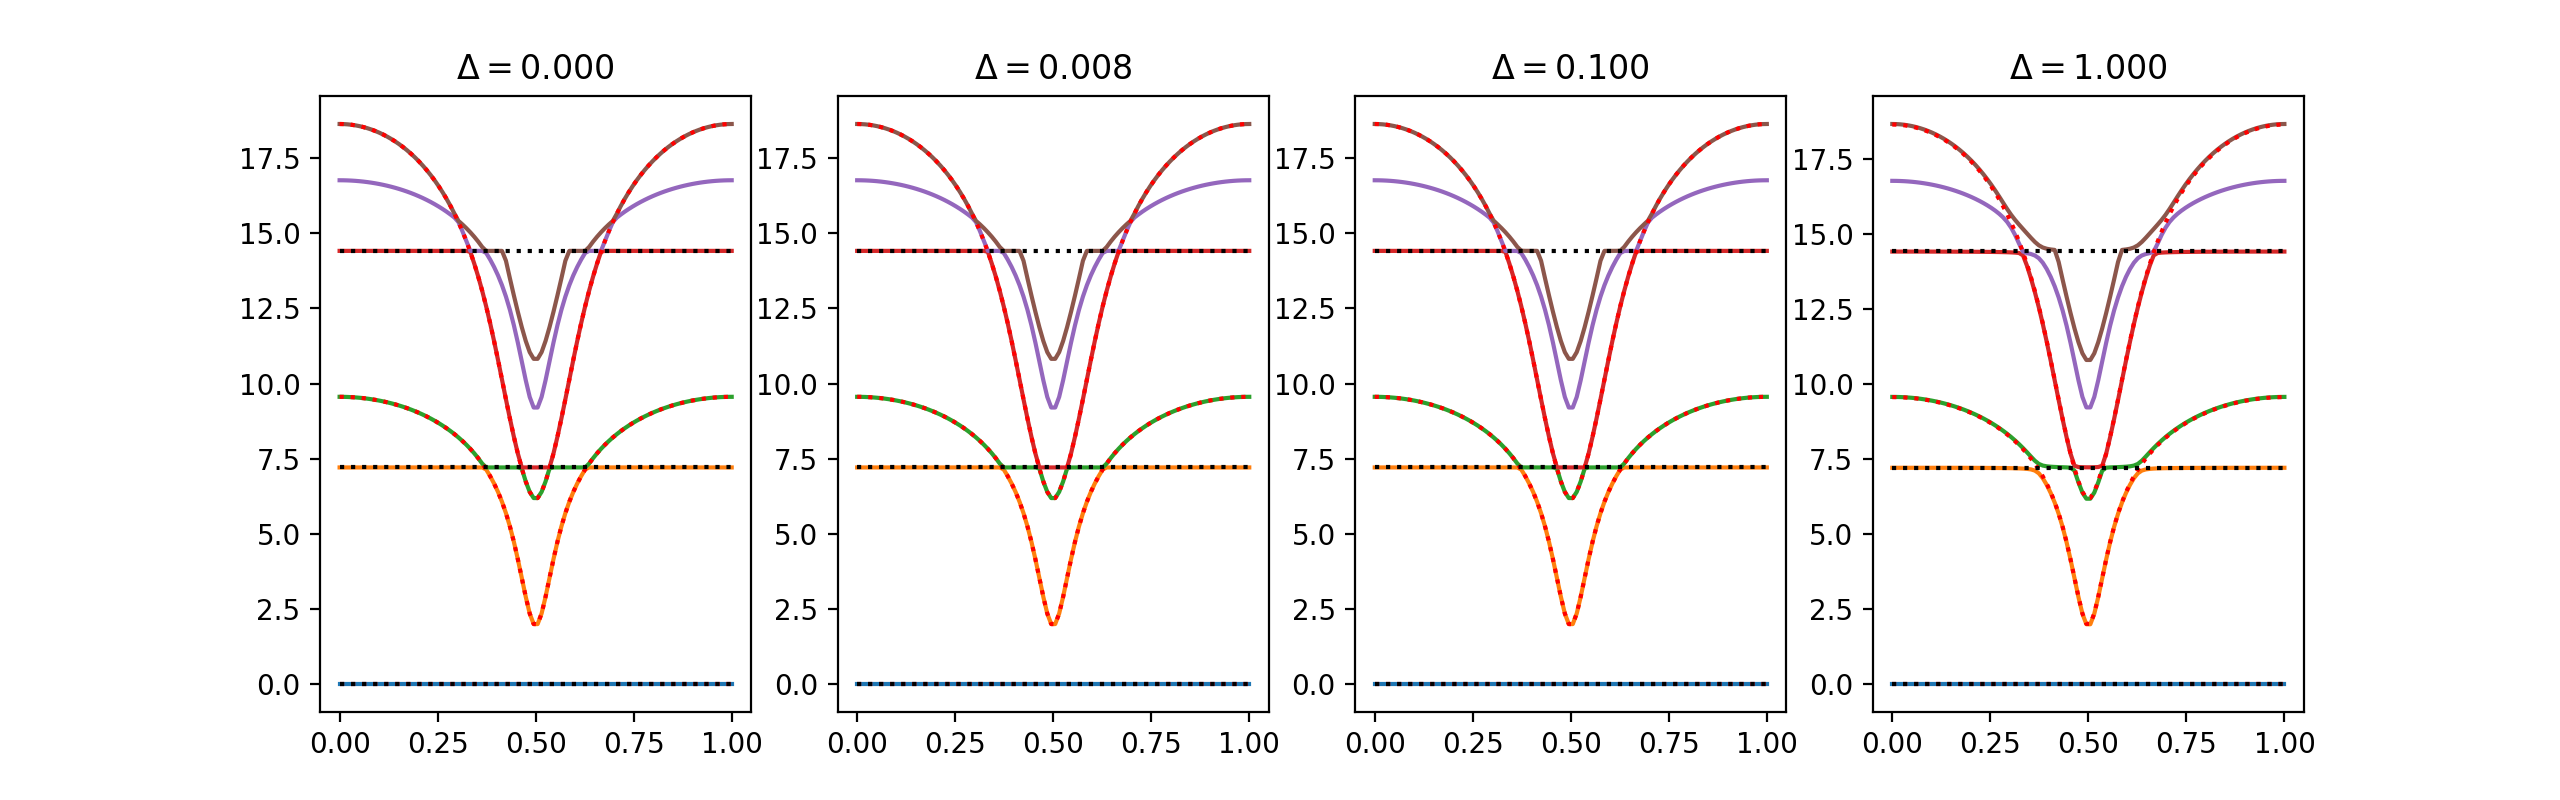

In [146]:
fig, axs = plt.subplots(dpi=200, ncols=len(Δ_values_plot), figsize = [8/2.5*len(Δ_values_plot), 4])

for i in range(len(Δ_values_plot)):
    axs[i].plot(φ_ext_values, E_qubit_vs_Δ_φext[i,:,:]- E_qubit_vs_Δ_φext[i,:,0].reshape(-1,1))
    axs[i].plot(φ_ext_values, E_fluxonium_vs_Δ_φext[i,:,:]- E_fluxonium_vs_Δ_φext[i,:,0].reshape(-1,1), color='r', linestyle = ':')
    axs[i].plot(φ_ext_values, E_resonator_vs_Δ_φext[i,:,:]- E_resonator_vs_Δ_φext[i,:,0].reshape(-1,1), color='k', linestyle = ':')

    axs[i].set_title(r'$\Delta=$' + f'{Δ_values[Δ_indices_plot[i]]:.3f}' )

fig.show()

## Spectrum vs Δ

In [147]:
circuit = qubit
n_eig = 8
circuit.set_trunc_nums([1, 5, 10])
phi = np.linspace(0,0.5,100)

E_circuit = np.zeros((n_eig, len(phi)))

for i in range(len(phi)):
    circuit.loops[0].set_flux(phi[i])
    E_circuit[:, i] = circuit.diag(n_eig)[0]

In [148]:
φext_values = [0, φ_ext_avoided_crossing_1q_1r, 0.5]

E_vs_Δ_φext = np.zeros([len(φext_values), len(Δ_values),  n_eig])

for i, φext in enumerate(φext_values):
    for j, qubit_Δ in enumerate(qubit_vs_Δ):
        qubit_Δ.loops[0].set_flux(φext)
        E_vs_Δ_φext[i, j , :] = qubit_Δ.diag(n_eig)[0]


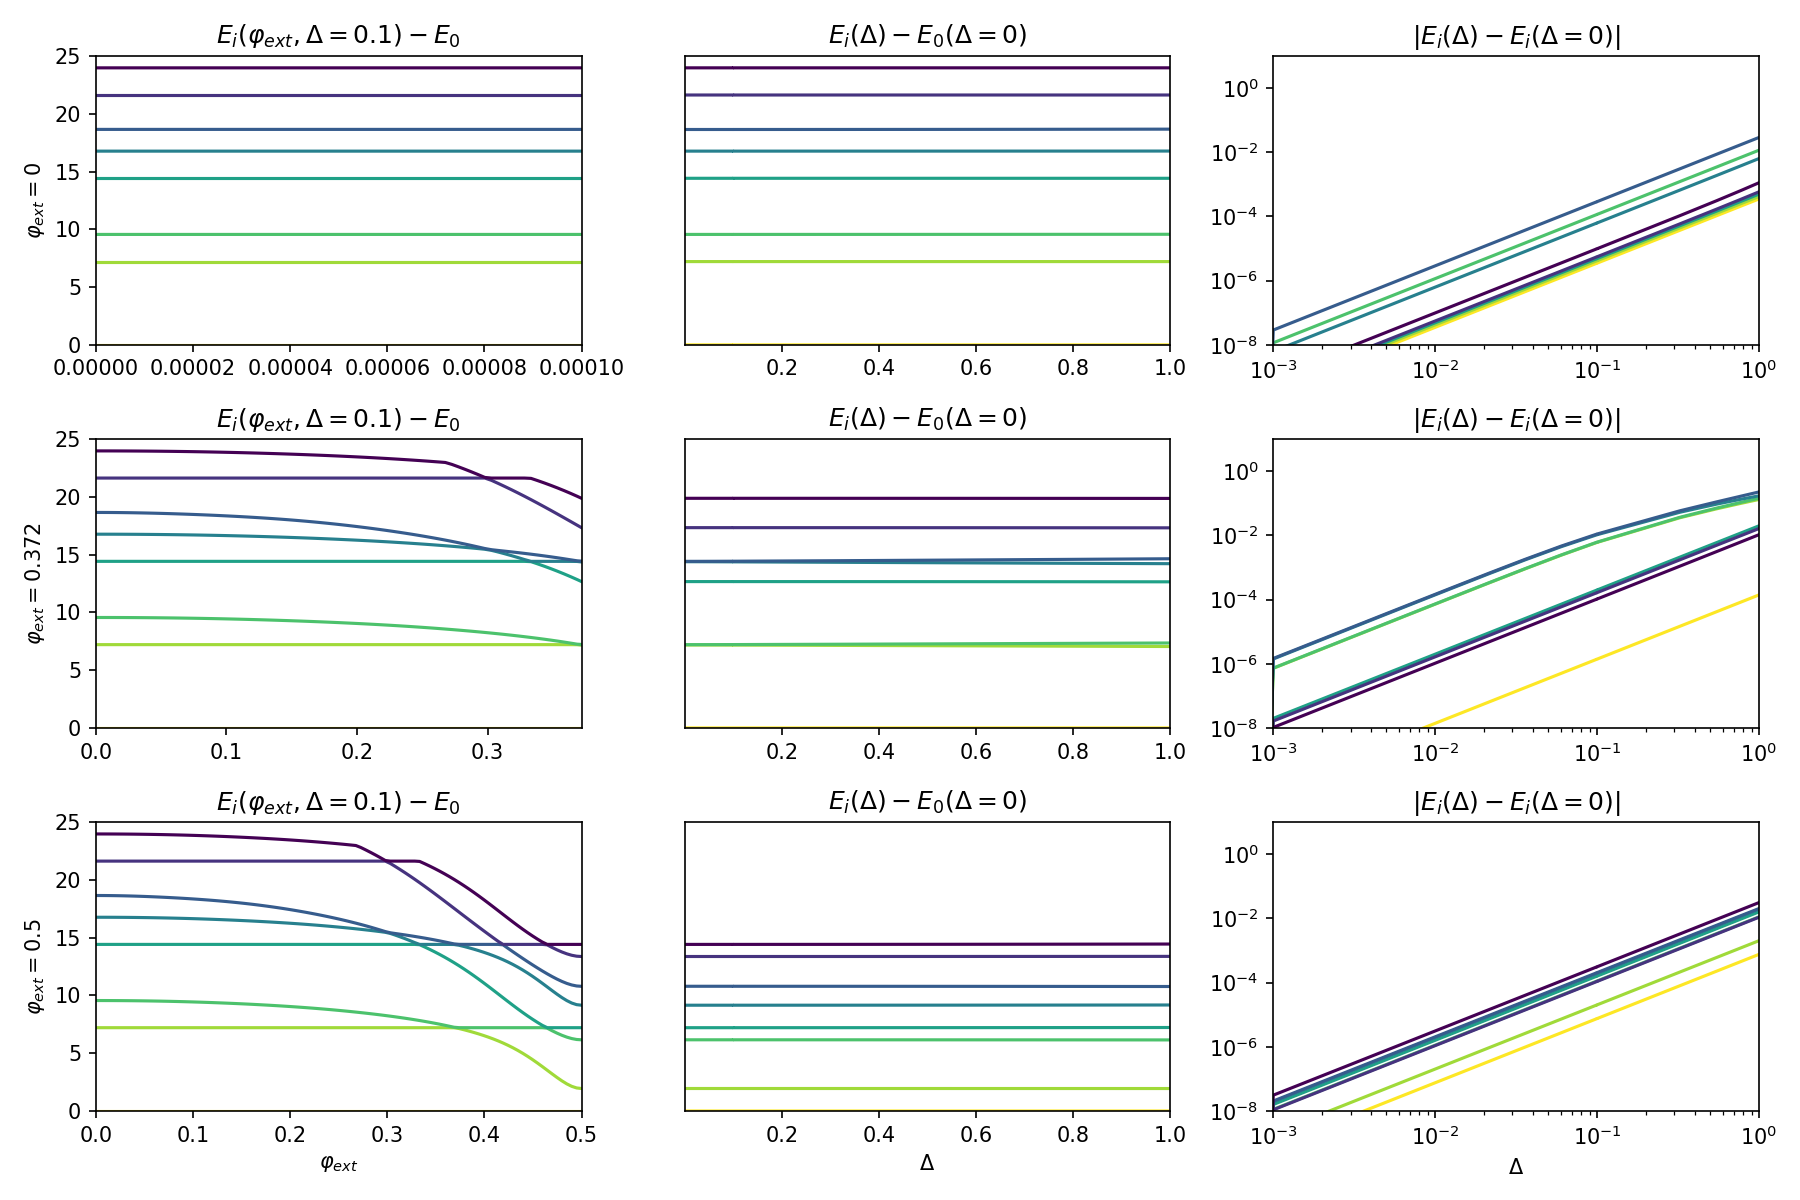

In [149]:
fig, axs = plt.subplots(nrows= 3, ncols = 3, figsize=[12,8], dpi=150)
eig_colors = plt.get_cmap('viridis_r')(np.linspace(0, 255, n_eig).astype('int'))

for i in range(n_eig):
    [axs[j,0].plot(phi, E_circuit[i,:]- E_circuit[0,:], color=eig_colors[i]) for j in range(len(φext_values)) ]

[axs[i,0].set_ylim([0,25]) for i in range(len(φext_values))]
[axs[i,0].set_title(r"$E_i(\varphi_{ext}, \Delta=0.1)-E_0$") for i in range(len(φext_values))]
[axs[i,0].set_ylabel(r'$ \varphi_{ext}=$' + f'{φext_values[i]}' ) for i in range(len(φext_values))]
axs[2,0].set_xlabel(r'$\varphi_{ext}$')

for i, φext in enumerate(φext_values):
    axs[i,0].set_xlim([0, φext+0.0001])
    for j in range(n_eig):
        axs[i,1].plot(Δ_values, E_vs_Δ_φext[i, :, j]- E_vs_Δ_φext[i, 0, 0], color=eig_colors[j])
        axs[i,2].plot(Δ_values, np.abs(E_vs_Δ_φext[i, :, j]- E_vs_Δ_φext[i, 0, j]), color=eig_colors[j])

    axs[i,1].margins(0)
    axs[i,1].set_ylim([0,25])
    axs[i,1].set_yticks([])
    axs[i,1].set_title(r'$E_i(\Delta)-E_0(\Delta=0)$')
    # axs[i,1].set_xscale('log')
    axs[i,2].set_title(r'$|E_i(\Delta)-E_i(\Delta=0)|$')
    axs[i,2].set_xscale('log')
    axs[i,2].set_yscale('log')
    axs[i,2].margins(0)
    axs[i,2].set_ylim([1e-8, 1e1])
    axs[i,2].set_xlim([Δ_values[1], Δ_values[-1]])

axs[2,1].set_xlabel(r'$\Delta$')
axs[2,2].set_xlabel(r'$\Delta$')

fig.tight_layout()
fig.show()

## Wavefunctions

In [137]:
# φ_ext = 0
# φ_ext = φ_ext_avoided_crossing
φ_ext = 0.5

φ_r = np.linspace(-3,3,200)
φ_f = np.linspace(-3, 3, 200)

φ_2 = np.linspace(-.03, .03, 100)/2/np.pi
φ_3 = np.linspace(-3, 3 , 100)/2/np.pi
grid_q = [0, φ_2, φ_3]

Ψ_r_0_vs_Δ = []
Ψ_r_1_vs_Δ = []
Ψ_f_0_vs_Δ = []
Ψ_f_1_vs_Δ = []
V_f_vs_Δ = []
Ψ_q_0_vs_Δ = []
Ψ_q_1_vs_Δ = []

n_eig = 4

for resonator_Δ, fluxonium_Δ, qubit_Δ, Δ in zip(resonator_vs_Δ, fluxonium_vs_Δ, qubit_vs_Δ, Δ_values):
    fluxonium_Δ.loops[0].set_flux(φ_ext)
    qubit_Δ.loops[0].set_flux(φ_ext)
    
    _, _ = resonator_Δ.diag(n_eig)
    # Ψ_r_0_vs_Δ.append( np.abs(resonator_Δ.eig_phase_coord(k=0, grid=[φ_r/2/np.pi]))**2 )
    # Ψ_r_1_vs_Δ.append( np.abs(resonator_Δ.eig_phase_coord(k=1, grid=[φ_r/2/np.pi]))**2 )
    
    V_r = 0.5 * E_L_r * φ_r **2
    
    _, _ = fluxonium_Δ.diag(n_eig)
    # Ψ_f_0_vs_Δ.append( np.abs(fluxonium_Δ.eig_phase_coord(k=0, grid=[φ_f/2/np.pi]))**2 )
    # Ψ_f_1_vs_Δ.append( np.abs(fluxonium_Δ.eig_phase_coord(k=1, grid=[φ_f/2/np.pi]))**2 )
    
    l_Δ = Lq*(Lq+4*Lr) - 4*Δ**2
    L_q = l_Δ / (Lq + 4 * Lr) * 1e-9
    E_L_f = (Φ_0 / (2 * np.pi)) ** 2 / L_q / h
    V_f_Δ = 0.5 * E_L_f * (φ_f) ** 2 - E_J * np.cos(φ_f - φ_ext * 2 * np.pi) 
    V_f_vs_Δ.append( (V_f_Δ-V_f_Δ.min())/1e9 )
    
    _, _ = qubit_Δ.diag(n_eig)
    # Ψ_q_0_vs_Δ.append( np.abs(qubit_Δ.eig_phase_coord(k=0, grid=grid_q).T)**2 )
    # Ψ_q_1_vs_Δ.append( np.abs(qubit_Δ.eig_phase_coord(k=1, grid=grid_q).T)**2 )

In [126]:
Δ_index = 1
eig_index = 1
N_f, N_r = sq_ext.get_energy_indices(qubit_vs_Δ[Δ_index], fluxonium_vs_Δ[Δ_index], resonator_vs_Δ[Δ_index])

In [127]:
ψq_0 = sq_ext.real_eigenvectors(qubit_vs_Δ[Δ_index]._evecs[eig_index])

In [128]:
ψfr_0 =sq_ext.real_eigenvectors(qt.tensor(resonator_vs_Δ[Δ_index]._evecs[N_r[eig_index]], fluxonium_vs_Δ[Δ_index]._evecs[N_f[eig_index]]))

In [129]:
np.all(np.isclose(ψq_0, ψfr_0))

False

# WTF

In [157]:
 np.real( sq_ext.H_eff_p1_fluxonium_resonator(fluxonium_vs_Δ[0], fluxonium_vs_Δ[Δ_index], resonator_vs_Δ[0], resonator_vs_Δ[Δ_index], N_f, N_r, Δ_values[Δ_index]) ).max()

0.0009071461426564435

In [158]:
np.real(sq_ext.H_eff_p1(qubit_vs_Δ[0], qubit_vs_Δ[Δ_index])-np.diag(np.diag(sq_ext.H_eff_p1(qubit_vs_Δ[0], qubit_vs_Δ[Δ_index])))).max()

0.000848954424585616

In [81]:
fig, axs = plt.subplots(ncols=2)
                       
axs[0].plot(φ_r, (V_r-V_r.min())/1e9, 'k:')
Ψ_r_0_plot, = axs[0].plot(φ_r, Ψ_r_0_vs_Δ[0], label=r'$\psi_R^0$')
Ψ_r_1_plot, = axs[0].plot(φ_r, Ψ_r_1_vs_Δ[0], label=r'$\psi_R^1$')
axs[0].set_xlabel(r'$\varphi_R$')
axs[0].set_ylim([-.1,3])

V_f_plot, =   axs[1].plot(φ_f, V_f_vs_Δ[0] , 'k:')
Ψ_f_0_plot, = axs[1].plot(φ_f, Ψ_f_0_vs_Δ[0], label=r'$\psi_F^0$')
Ψ_f_1_plot, = axs[1].plot(φ_f, Ψ_f_1_vs_Δ[0], label=r'$\psi_F^1$')
axs[1].set_xlabel(r'$\varphi_F$')
axs[1].set_ylim([-.1,4])

ani = figs.animation(fig, [Ψ_r_0_plot, Ψ_r_1_plot, Ψ_f_0_plot, Ψ_f_1_plot, V_f_plot], 
                          [Ψ_r_0_vs_Δ, Ψ_r_1_vs_Δ, Ψ_f_0_vs_Δ, Ψ_f_1_vs_Δ, V_f_vs_Δ],
                           r'$\Delta=$', Δ_values)
 
HTML(ani.to_jshtml())

NameError: name 'φ_r' is not defined

In [152]:
fig, axs = plt.subplots(ncols=2)
                       
Ψ_q_0_plot = axs[0].contourf(φ_3, φ_2, Ψ_q_0_vs_Δ[0], cmap="Blues")
axs[0]. set_ylabel(r'$\tilde{\varphi}_R$')
axs[0]. set_xlabel(r'$\tilde{\varphi}_F$')
axs[0].text(.9,.9, r'$\psi^0$', transform=axs[0].transAxes, ha="center", va="center")

Ψ_q_1_plot = axs[1].contourf(φ_3, φ_2, Ψ_q_1_vs_Δ[1], cmap="Oranges")
axs[1]. set_ylabel(r'$\tilde{\varphi}_R$')
axs[1]. set_xlabel(r'$\tilde{\varphi}_F$')
axs[1].text(.9,.9, r'$\psi^1$', transform=axs[1].transAxes, ha="center", va="center")

ani = figs.animation_contour(fig, [Ψ_q_0_plot, Ψ_q_1_plot ],
                                   φ_3, φ_2, 
                                  [Ψ_q_0_vs_Δ, Ψ_q_1_vs_Δ],
                                   r'$\Delta=$', Δ_values)
 
HTML(ani.to_jshtml())

# Fluxonium-Resonator internal coupling

In [14]:
# φ_ext_values = np.concatenate((np.linspace(0, 0.3, 20), np.linspace(0.3, 0.5, 80) ))
# φ_ext_values = np.linspace(0,0.5,50)
φ_ext_values = np.array([0.5, 0.49, 0.1, 0])
φ_ext_values = np.array([0.5])
n_eig = 8

I = np.eye(n_eig)
H_eff_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p1_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p1_f_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p2_f_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
H_eff_p2_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig], dtype='complex')
U_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig, n_eig])
N_f_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig], dtype='int')
N_r_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(Δ_values), n_eig], dtype='int')

for i, φ_ext in enumerate(φ_ext_values):
    qubit_nonint = qubit_vs_Δ[0]
    qubit_nonint.loops[0].set_flux(φ_ext)
    _ = qubit_nonint.diag(n_eig)

    fluxonium_nonint = fluxonium_vs_Δ[0]
    fluxonium_nonint.loops[0].set_flux(φ_ext)
    _ = fluxonium_nonint.diag(n_eig)

    resonator_nonint = resonator_vs_Δ[0]
    _ = resonator_nonint.diag(n_eig)

    for j, (qubit_Δ, fluxonium_Δ, resonator_Δ ) in enumerate( zip(qubit_vs_Δ, fluxonium_vs_Δ, resonator_vs_Δ )):
        qubit_Δ    .loops[0].set_flux(φ_ext)
        fluxonium_Δ.loops[0].set_flux(φ_ext)

        _ = qubit_Δ    .diag(n_eig)
        _ = fluxonium_Δ.diag(n_eig)
        _ = resonator_Δ.diag(n_eig)

        H_eff_vs_Δ_φ_ext[i, j, :], U_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_SWT_circuit(qubit_nonint, qubit_Δ, return_transformation=True)
        H_eff_p1_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p1(qubit_nonint, qubit_Δ)
        H_eff_p2_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p2(qubit_nonint, qubit_Δ)

        N_f, N_r = sq_ext.get_energy_indices(qubit_Δ, fluxonium_Δ, resonator_Δ)
        N_f_vs_Δ_φ_ext[i, j, :] = N_f
        N_r_vs_Δ_φ_ext[i, j, :] = N_r
        if j == 0:
            continue
        try:
            H_eff_p1_f_r_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p1_fluxonium_resonator(fluxonium_nonint, fluxonium_Δ, resonator_nonint, resonator_Δ, N_f, N_r, Δ_values[j])
            H_eff_p2_f_r_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_p2_fluxonium_resonator(fluxonium_nonint, fluxonium_Δ, resonator_nonint, resonator_Δ, N_f, N_r, Δ_values[j])
        except:
            pass

C:\Users\gabri\AppData\Local\Temp\ipykernel_14904\3339243370.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  H_eff_vs_Δ_φ_ext[i, j, :], U_vs_Δ_φ_ext[i, j, :] = sq_ext.H_eff_SWT_circuit(qubit_nonint, qubit_Δ, return_transformation=True)


In [16]:
H_eff_p2_f_r_vs_Δ_φ_ext *= 2e6

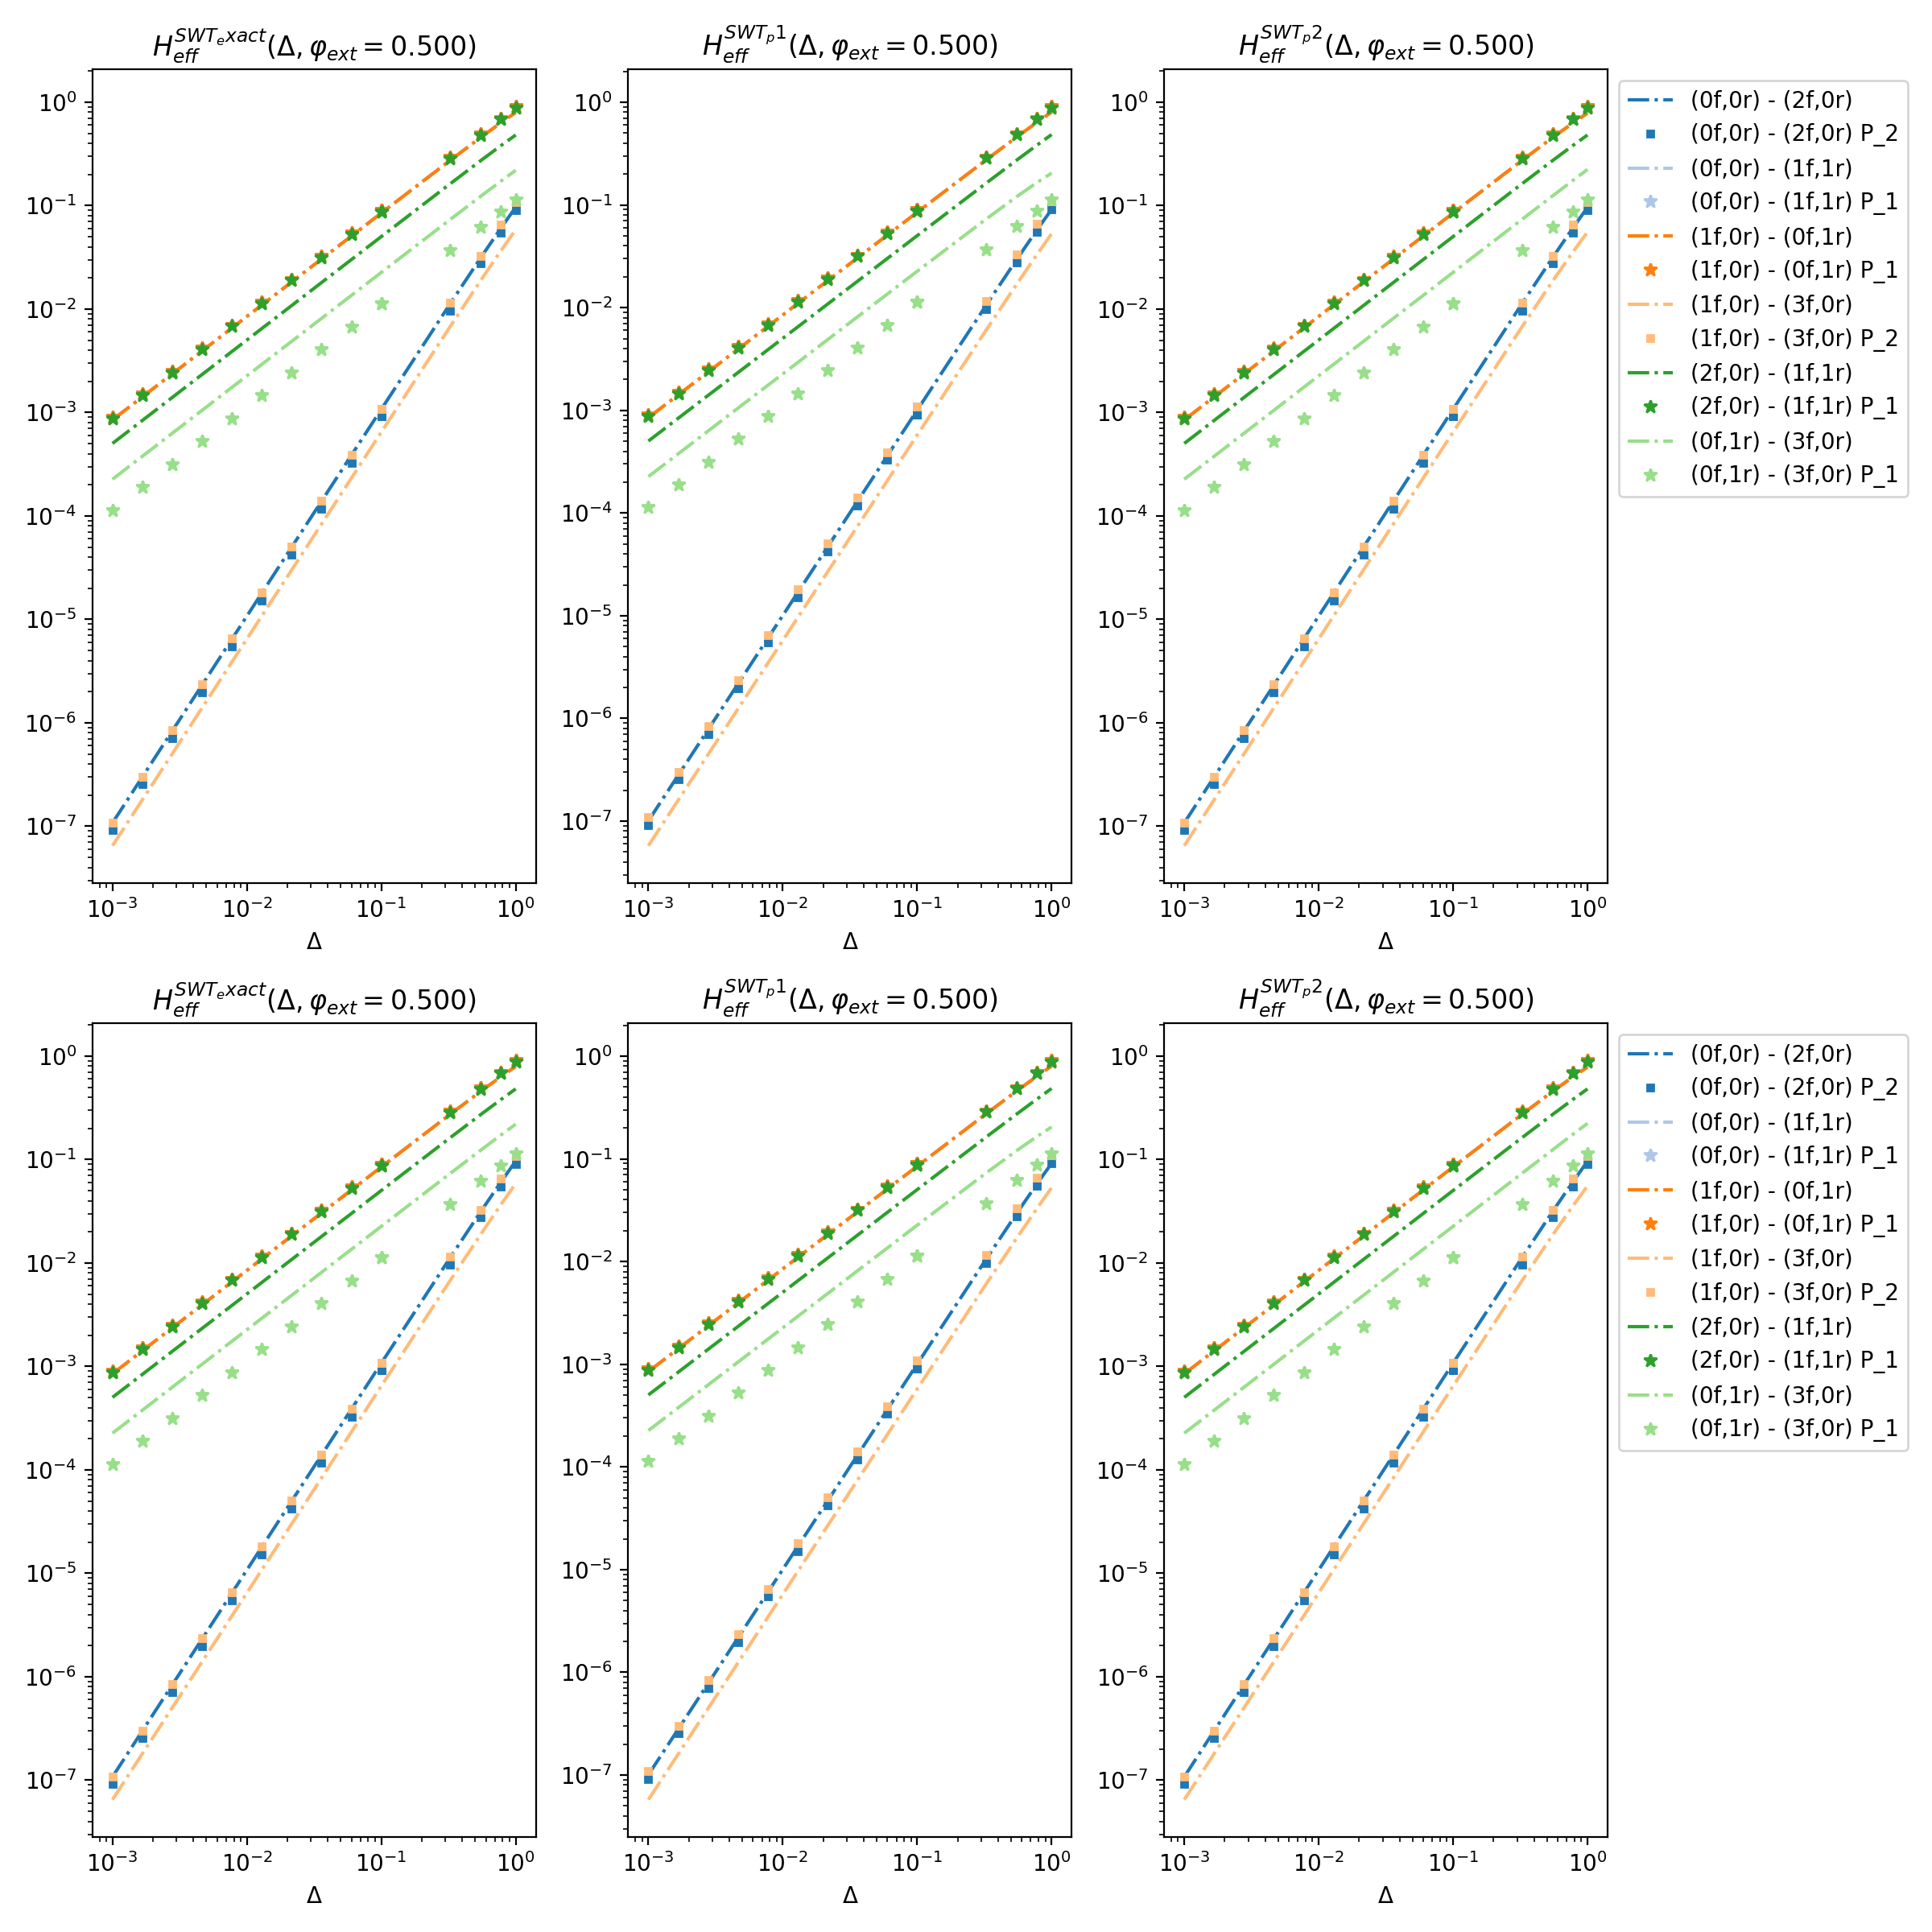

In [17]:
φ_ext = φ_ext_avoided_crossing_1q_1r
φ_ext = 0
φ_ext = 0.5
n_eig_plot = 6
colors = figs.generate_colors_from_colormap(20, 'tab20')
label_color_dict ={}

# φ_ext_values_plot = [0.5, φ_ext_avoided_crossing_2q_1r, φ_ext_avoided_crossing_1q_1r, 0]
φ_ext_values_plot = np.array(φ_ext_values)
φ_ext_values_plot = np.array([0, 0.5])

fig, axs = plt.subplots(ncols = 3, nrows=len(φ_ext_values_plot), dpi=200, figsize = [12,12])

for l, H_eff in enumerate([H_eff_vs_Δ_φ_ext, H_eff_p1_vs_Δ_φ_ext, H_eff_p2_vs_Δ_φ_ext]):
    ax = axs[:,l]
    for k, φ_ext in enumerate(φ_ext_values_plot):
        φ_ext_index = (np.abs(φ_ext_values - φ_ext)).argmin()

        for i in range(n_eig_plot):
            for j in range(i, n_eig_plot):
                # label, i_f, j_f, i_r, j_r = \
                #     sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                # color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)

                # Effective hamiltonians using the full circuit
                if np.any(np.abs(H_eff[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j])>1e-3):
                    if i != j:
                        label, i_f, j_f, i_r, j_r = \
                        sq_ext.get_state_label(N_f_vs_Δ_φ_ext[φ_ext_index,1,:], N_r_vs_Δ_φ_ext[φ_ext_index,1,:], i, j, return_numeric_indices=True)
                        color, label_color_dict, _ = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                        ax[k].plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]), '-.', label=label, color=color)
                    # else:
                        # ax[k].plot(Δ_values[1:], np.abs(H_eff[φ_ext_index, 1:, i, j]-H_eff[φ_ext_index, 0, i, j]), label=label, color=color, alpha=0.5)

                # First order effective hamiltonian using fluxonium + resonator model
                if np.any(np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j])>1e-3):
                    if i != j: 
                        ax[k].plot(Δ_values[1:], np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]), '*', label=label+' P_1', color=color)
                    # else:
                    #     ax[k].plot(Δ_values[1:], np.abs(H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p1_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j]),'*', label=label, color=color, alpha=0.5)

                # Second order effective hamiltonian using fluxonium + resonator model
                if np.any(np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j])>1e-3) or \
                   np.any(np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j])>1e-3):
                    if i != j:
                        ax[k].plot(Δ_values[1:], np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]), 's', markersize=3, label=label+' P_2', color=color)
                    # else:
                    #     ax[k].plot(Δ_values[1:], np.abs(H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 1:, i, j]-H_eff_p2_f_r_vs_Δ_φ_ext[φ_ext_index, 0, i, j]),'s', markersize=3, label=label, color=color)

        ax[k].set_xlabel('$\Delta$')
        ax[k].set_xscale('log')
        ax[k].set_yscale('log')
        # ax[k].set_ylim([1e-7,1e0])
        if l == 0:
            ax[k].set_title((r'$H_{eff}^{SWT_exact}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))

        elif l == 1:
            ax[k].set_title((r'$H_{eff}^{SWT_p1}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))
            
        else:
            ax[k].set_title((r'$H_{eff}^{SWT_p2}(\Delta, \varphi_{ext}=$' + f'{φ_ext_values[φ_ext_index]:.3f})'))
            ax[k].legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
fig.show()

In [70]:
circ_0 = qubit_vs_Δ[0]
circ = qubit_vs_Δ[-1]
ψ_0 = sq_ext.real_eigenvectors(np.array([ψ_i.__array__()[:, 0] for ψ_i in circ_0._evecs]).T)
ψ   = sq_ext.real_eigenvectors(np.array([ψ_i.__array__()[:, 0] for ψ_i in circ.  _evecs]).T)
E_0 = circ_0.efreqs
E   = circ  .efreqs
H_0 = circ_0.hamiltonian().__array__() / GHz /2 /np.pi
H   = circ  .hamiltonian().__array__() / GHz /2 /np.pi
V   = (H-H_0)

In [31]:
H_eff_1 = ψ_0.conj().T @ H @ ψ_0
n_eig = ψ_0.shape[1]
H_eff_2 = np.zeros((n_eig, n_eig), dtype=complex)  # matrix to store our results.

for i in range(n_eig):
    for j in range(n_eig):
        H_eff_2[i, j] = 1 / 2 * sum(
                      (1 / (E_0[i] - E[k]) + 1 / (E_0[j] - E[k])) *
                       (ψ_0[:, i].T.conj() @ V @ ψ[:, k]) * \
                       (ψ[:, k].T.conj() @ V @ ψ_0[:, j])
                       for k in range(n_eig))

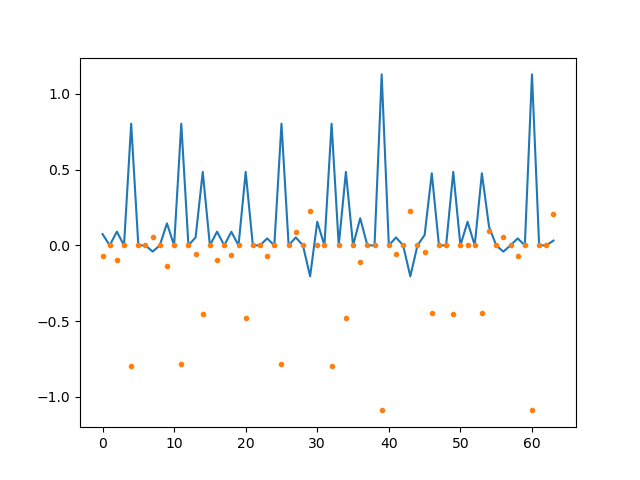

In [110]:
fig, ax = plt.subplots()
ax.plot(H_eff_1.ravel())
ax.plot(H_eff_2.ravel(), '.')
fig.show()

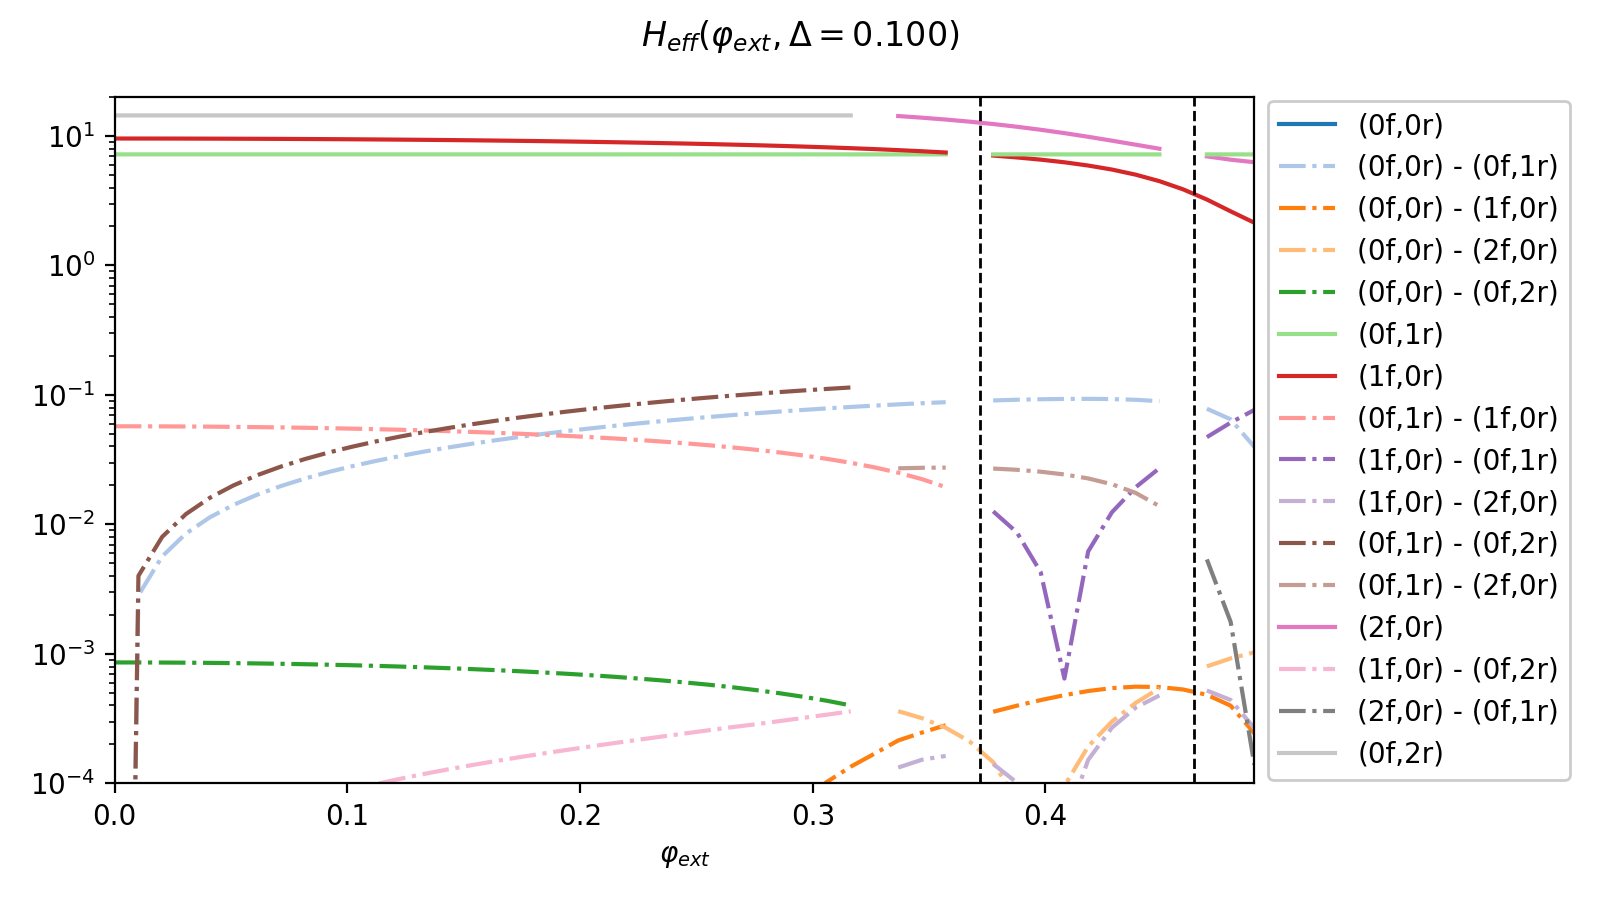

In [167]:
Δ_value = 0.1

fig, ax = plt.subplots(dpi=200, figsize = [8,4.5])
Δ_index = (np.abs(Δ_values - Δ_value)).argmin()
colors = figs.generate_colors_from_colormap(20, 'tab20')
# colors = figs.generate_colors_from_colormap(30, 'viridis')
label_color_dict ={}
n_eig_plot=4

for i in range(n_eig_plot):
    for j in range(i, n_eig_plot):
        if np.any(np.abs(H_eff_vs_Δ_φ_ext[:, Δ_index, i, j])>1e-2) or \
                np.any(H_eff_vs_Δ_φ_ext[:, Δ_index, i, j]-H_eff_vs_Δ_φ_ext[:, Δ_index, 0, 0]>1e-2):
            labels = [sq_ext.get_state_label(N_f, N_r, i, j) for N_f, N_r in zip(N_f_vs_Δ_φ_ext[:,Δ_index], N_r_vs_Δ_φ_ext[:,Δ_index]) ]
            labels_and_intervals = sq_ext.find_indices(labels)

            for label, interval in labels_and_intervals:
                color, label_color_dict, newly_assigned = sq_ext.get_or_assign_color(label, colors, label_color_dict)
                if not newly_assigned:
                    label=None
                if i==j:
                    ax.plot(φ_ext_values[interval[0]:interval[-1]],\
                            H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, i, j]- H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, 0, 0], \
                            label=label, color=color)
                else:
                    ax.plot(φ_ext_values[interval[0]:interval[-1]], \
                            np.abs(H_eff_vs_Δ_φ_ext[interval[0]:interval[-1], Δ_index, i, j]), \
                            '-.',label=label, color=color)

ax.legend(framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'$\varphi_{ext}$')
ax.set_yscale('log')
fig.suptitle((r'$H_{eff}(\varphi_{ext}, \Delta=$' + f'{Δ_values[Δ_index]:.3f})'))
ax.set_ylim([1e-4,2e1])
ax.margins(0)
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-5, 2e1, 'k', '--', linewidth=1)
fig.tight_layout()
fig.show()

In [ ]:
U_to_I_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
p1_to_SWT_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
g_vs_Δ_φ_ext = np.zeros([len(φ_ext_values), len(qubit_vs_Δ)])
for i in range(len(φ_ext_values)):
    for j in range(len(qubit_vs_Δ)):
        g = []
        for k in range(4):
            for l in range(k+1, 4):
                g.append(H_eff_vs_Δ_φ_ext[i, j, k, l ])
        g_vs_Δ_φ_ext[i,j] = max(g)
        U_to_I_vs_Δ_φ_ext[i,j] = np.sum((U_vs_Δ_φ_ext[i, j] - I)**2)
        p1_to_SWT_vs_Δ_φ_ext[i,j] = np.sum((H_eff_vs_Δ_φ_ext[i, j,:4,:4] - H_eff_p1_vs_Δ_φ_ext[i, j,:4,:4])**2)

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])

cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(g_vs_Δ_φ_ext[:,1:].T), vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.colorbar(cont, ticks=np.arange(-6,3))
fig.suptitle('$log(g)$')
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(U_to_I_vs_Δ_φ_ext[:,1:].T))#, vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.suptitle(r'$log||U-I||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], np.log(p1_to_SWT_vs_Δ_φ_ext[:,1:].T))#, vmin=-6, levels=np.linspace(-6,2,9))
ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
fig.suptitle(r'$log||H_{eff}^{SWT}-H_{eff}^{p1}||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()

In [39]:
N_r_vs_Δ_φ_ext

array([[[0.0e+00, 2.0e+00, 1.0e+00, 3.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        ...,
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00]],

       [[0.0e+00, 2.0e+00, 1.0e+00, 3.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        ...,
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00]],

       [[0.0e+00, 2.0e+00, 1.0e+00, 3.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        ...,
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00],
        [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+00]],

       ...,

       [[0.0e+00, 1.0e+00, 2.0e+00, 1.0e+00],
        [0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00],
        [0.0e+00, 0.0e

In [60]:
fig, ax = plt.subplots(dpi=200, figsize = [8,5])
cont = ax.contourf(φ_ext_values, Δ_values[1:], N_f_vs_Δ_φ_ext[:,1:,0].T)#, vmin=-6, levels=np.linspace(-6,2,9))
# ax.vlines([φ_ext_avoided_crossing_1q_1r, φ_ext_avoided_crossing_2q_1r], 1e-3, 1e1, 'k', '--', linewidth=1)
ax.set_yscale('log')
# fig.suptitle(r'$log||H_{eff}^{SWT}-H_{eff}^{p1}||$')
fig.colorbar(cont)
ax.set_ylabel(r'$\Delta$')
ax.set_xlabel(r'$\varphi_{ext}$')
fig.show()